# CAPÍTULO 3 - Experimentos Estatísticos e Teste de Significância
***

<div class="alert alert-block alert-info">
<b>Importante:</b>

1. Por que precisamos de uma hipótese? Por que não apenas observar o resultado do experimento e optar pelo tratamento que se sair melhor?
- Pois, naturalmente, pode haver um comportamento aleatório melhor. (Pode existir eventos extremos - Cisnes negros)
</div>

[Teste A/B](https://www.evanmiller.org/ab-testing/sample-size.html#!9.26;80;5;1;0) | [AB+ Test Calculator by CXL](https://cxl.com/ab-test-calculator/?calculator)

---

### Reamostragem:
> Amostar repedidamente os valores a partir dos dados observados, com um objetivo geral de avaliar a variabilidade aleatória em uma estatística

<b>1. Bootstrap:</b> Usado para avaliar a confiabilidade de uma estimativa;

<b>2. Teste de Permutação:</b> Usado para testar hipóteses, geralmente envolvendo dois ou mais grupos
- 2.1. Teste de permutação exaustiva;
- 2.2. Teste de permutação bootstrap
---

#### Bibliotecas

In [5]:
library(tidyverse)

In [6]:
session_times <- data.frame(
  Page = c('Page A','Page B','Page A','Page B','Page A','Page B','Page A','Page B',
           'Page A','Page B','Page A','Page B','Page A','Page B','Page A','Page B',
           'Page A','Page B','Page A','Page B','Page A','Page B','Page A','Page B',
           'Page A','Page B','Page A','Page B','Page A','Page B','Page A','Page A',
           'Page A','Page A','Page A','Page A'),
  Time = c(0.21,2.53,0.35,0.71,0.67,0.85,2.11,2.46,1.32,1.49,0.68,0.75,3.21,
           3.33,1.47,1.87,0.95,1.26,0.45,0.48,1.18,1.47,3.42,3.57,1.97,2.23,
           0.39,0.43,0.65,0.87,1.73,0.74,0.86,1.18,2.06,0.93)
)

In [8]:
session_times %>% head()

Page,Time
Page A,0.21
Page B,2.53
Page A,0.35
Page B,0.71
Page A,0.67
Page B,0.85


In [24]:
session_times %>% group_by(Page) %>% count()

Page,n
Page A,21
Page B,15


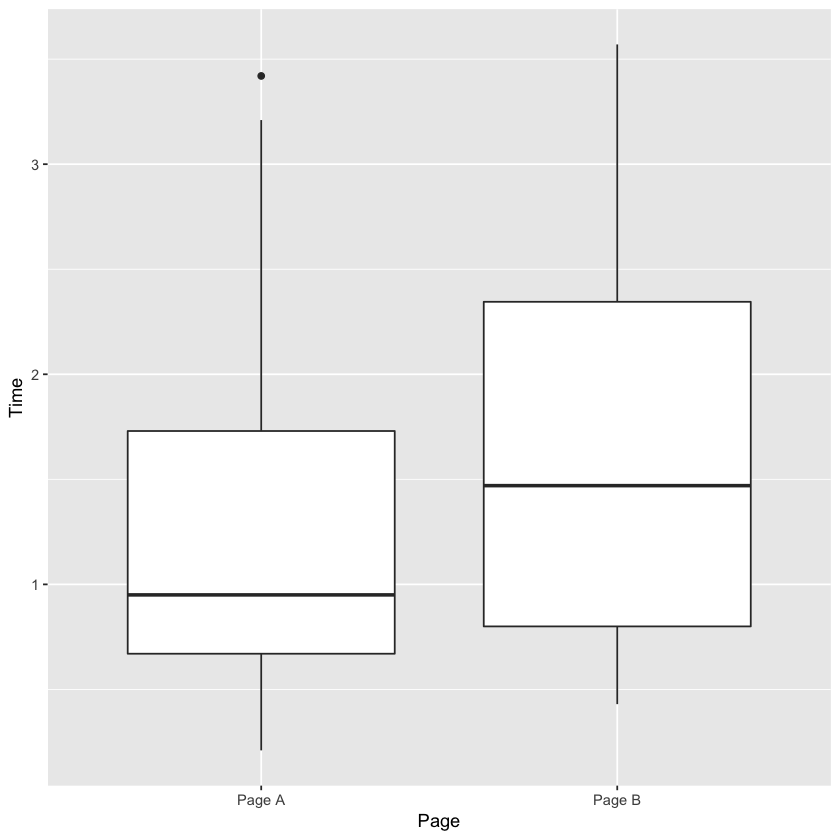

In [10]:
# o boxplot indica que a página B leva a sessões mais longas do que a página A
ggplot(session_times, aes(x=Page, y=Time))+
    geom_boxplot()

In [18]:
mean_a <- mean(session_times[session_times$Page == "Page A", c("Time")])
mean_a %>% round(2)

[1] 1.26

In [14]:
mean_b <- mean(session_times[session_times$Page == "Page B", c("Time")])
mean_b

[1] 1.62

#### Teste de Permutação

In [25]:
# Função para atribuir aleatoriamente valores a cada grupo (amostrando sem reposição)
perm_func <- function(x, n1, n2){
  n <- n1 + n2
  idx_b <- sample(1:n, n1)  # n1 números aleatórios no intervalo de 1 até n
  idx_a <- setdiff(1:n, idx_b) # todos do intervalo acima que não foram selecionados
  mean_diff <- mean(x[idx_b]) - mean(x[idx_a])
  return(mean_diff)
}

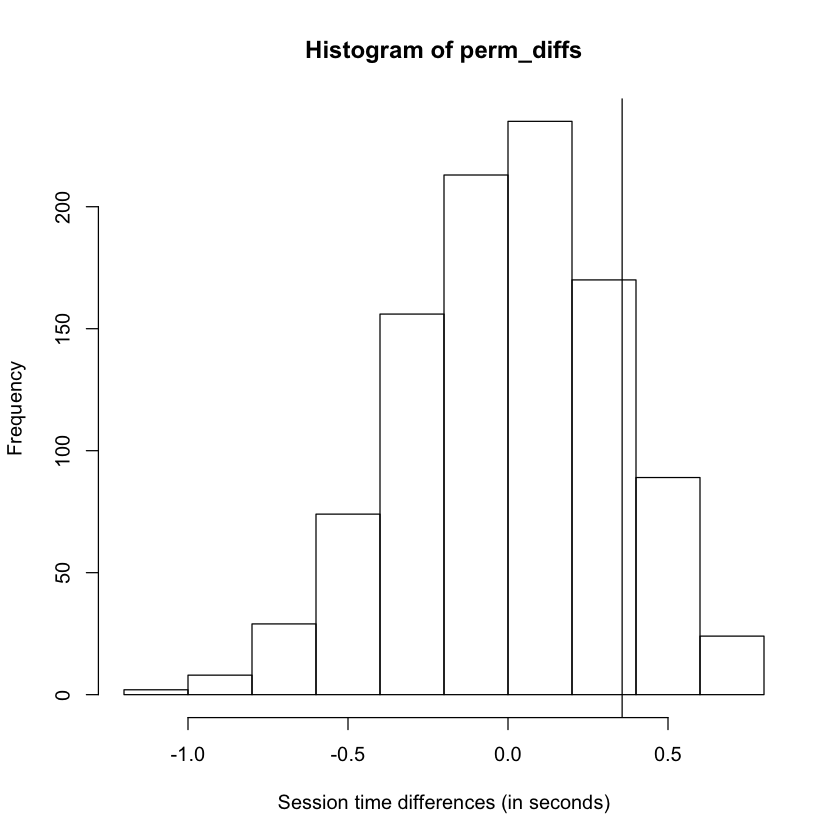

In [26]:
# Vamos chamar a função 1000 vezes para ver a distribuição das diferenças nos tempos
#das médias com um histograma
perm_diffs <- rep(0, 1000) # cria um vetor de 0s de tamanho 1000
for(i in 1:1000){
  perm_diffs[i] = perm_func(session_times$Time, 21, 15)
}

#Histograma das médias geradas aleatoriamente
hist(perm_diffs,
     xlab = "Session time differences (in seconds)")

#Média calculada anteriormente
abline(v = mean_b - mean_a)